In [1]:
import os
import random
import warnings
import numpy as np
import sys
import matplotlib.pyplot as plt

from skimage.transform import resize
from tqdm import tqdm
from skimage.io import imread, imshow, imread_collection, concatenate_images

In [14]:
TRAIN_PATH = './input/stage1_train/'
TEST_PATH = './input/stage1_test/'

IMG_CHANNELS = 3
# Get train and test IDs
train_ids = next(os.walk(TRAIN_PATH))[1]
test_ids = next(os.walk(TEST_PATH))[1]

The mask and image have same size;
Each image has three channel and each mask has only one channel

In [15]:
ix = random.randint(0, len(train_ids))
path = TRAIN_PATH + train_ids[ix]
img = imread(path + '/images/' + train_ids[ix] + '.png')[:, :, :IMG_CHANNELS]
print(img.shape)
for mask_file in next(os.walk(path + '/masks/'))[2]:
    mask_ = imread(path + '/masks/' + mask_file)
    print(mask_.shape)


(256, 320, 3)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)


Loop over the dataset to find the largest/smallest size of figure and the distribution of mask number

In [39]:
NumMask = []
Max_shape = [0,0]
Min_shape = [1024,1024]
for n, id_ in tqdm(enumerate(train_ids), total=len(train_ids)):
    path = TRAIN_PATH + id_
    img = imread(path + '/images/' + id_ + '.png')[:, :, :IMG_CHANNELS]
    imgSize = img.shape[0] * img.shape[1]
    if imgSize> Max_shape[0] * Max_shape[1]:
        Max_shape = img.shape
    if imgSize < Min_shape[0] * Min_shape[1]:
        Min_shape = img.shape
    NumMask.append(len(next(os.walk(path + '/masks/'))[2]))
#X_train = images
#Y_train = labels

print(Max_shape)
print(Min_shape)

  0%|          | 0/670 [00:00<?, ?it/s]

  1%|▏         | 9/670 [00:00<00:07, 87.68it/s]

  3%|▎         | 17/670 [00:00<00:07, 82.61it/s]

  4%|▎         | 24/670 [00:00<00:10, 62.96it/s]

  4%|▍         | 29/670 [00:00<00:12, 50.69it/s]

  5%|▍         | 33/670 [00:00<00:13, 49.00it/s]

  7%|▋         | 46/670 [00:00<00:11, 55.16it/s]

  8%|▊         | 54/670 [00:00<00:10, 57.68it/s]

 10%|▉         | 65/670 [00:01<00:09, 62.43it/s]

 11%|█▏        | 77/670 [00:01<00:09, 61.67it/s]

 13%|█▎        | 84/670 [00:01<00:09, 62.13it/s]

 14%|█▎        | 91/670 [00:01<00:09, 62.12it/s]

 15%|█▌        | 101/670 [00:01<00:09, 62.53it/s]

 16%|█▌        | 108/670 [00:01<00:09, 60.44it/s]

 17%|█▋        | 114/670 [00:01<00:09, 57.41it/s]

 18%|█▊        | 120/670 [00:02<00:10, 54.56it/s]

 19%|█▉        | 127/670 [00:02<00:09, 54.31it/s]

 20%|█▉        | 132/670 [00:02<00:10, 53.04it/s]

 20%|██        | 137/670 [00:02<00:10, 52.45it/s]

 21%|██        | 142/670 [00:02<00:10, 49.41it/s]

 22%|██▏       | 148/670 [00:02<00:10, 49.60it/s]

 23%|██▎       | 154/670 [00:03<00:10, 47.99it/s]

 24%|██▎       | 158/670 [00:03<00:11, 45.79it/s]

 25%|██▌       | 170/670 [00:03<00:10, 47.82it/s]

 27%|██▋       | 178/670 [00:03<00:10, 48.19it/s]

 28%|██▊       | 185/670 [00:03<00:09, 48.72it/s]

 29%|██▉       | 196/670 [00:03<00:09, 49.14it/s]

 30%|███       | 202/670 [00:04<00:09, 49.40it/s]

 31%|███       | 208/670 [00:04<00:09, 49.12it/s]

 33%|███▎      | 219/670 [00:04<00:08, 50.43it/s]

 34%|███▎      | 226/670 [00:04<00:08, 50.44it/s]

 35%|███▍      | 233/670 [00:04<00:08, 49.95it/s]

 36%|███▌      | 241/670 [00:04<00:08, 50.56it/s]

 37%|███▋      | 248/670 [00:04<00:08, 50.43it/s]

 38%|███▊      | 255/670 [00:05<00:08, 50.73it/s]

 39%|███▉      | 261/670 [00:05<00:08, 50.08it/s]

 40%|███▉      | 267/670 [00:05<00:08, 49.56it/s]

 41%|████      | 272/670 [00:05<00:08, 49.32it/s]

 41%|████▏     | 278/670 [00:05<00:07, 49.29it/s]

 42%|████▏     | 283/670 [00:05<00:07, 48.91it/s]

 43%|████▎     | 288/670 [00:05<00:07, 48.45it/s]

 44%|████▍     | 294/670 [00:06<00:07, 48.61it/s]

 45%|████▍     | 299/670 [00:06<00:07, 47.65it/s]

 45%|████▌     | 304/670 [00:06<00:07, 47.58it/s]

 46%|████▌     | 308/670 [00:06<00:07, 47.31it/s]

 47%|████▋     | 315/670 [00:06<00:07, 47.62it/s]

 49%|████▉     | 327/670 [00:06<00:07, 48.49it/s]

 50%|████▉     | 334/670 [00:06<00:06, 48.78it/s]

 51%|█████     | 341/670 [00:07<00:06, 48.51it/s]

 52%|█████▏    | 351/670 [00:07<00:06, 48.99it/s]

 53%|█████▎    | 358/670 [00:07<00:06, 49.04it/s]

 54%|█████▍    | 365/670 [00:07<00:06, 49.30it/s]

 56%|█████▌    | 372/670 [00:07<00:06, 49.54it/s]

 57%|█████▋    | 379/670 [00:07<00:05, 49.56it/s]

 57%|█████▋    | 385/670 [00:07<00:05, 48.76it/s]

 59%|█████▉    | 396/670 [00:08<00:05, 49.39it/s]

 60%|██████    | 404/670 [00:08<00:05, 48.97it/s]

 61%|██████    | 410/670 [00:08<00:05, 48.71it/s]

 62%|██████▏   | 415/670 [00:08<00:05, 48.67it/s]

 63%|██████▎   | 420/670 [00:08<00:05, 48.64it/s]

 63%|██████▎   | 425/670 [00:08<00:05, 48.36it/s]

 64%|██████▍   | 430/670 [00:08<00:05, 47.84it/s]

 65%|██████▍   | 434/670 [00:09<00:04, 47.74it/s]

 65%|██████▌   | 438/670 [00:09<00:04, 47.64it/s]

 66%|██████▌   | 443/670 [00:09<00:04, 47.47it/s]

 67%|██████▋   | 451/670 [00:09<00:04, 47.80it/s]

 69%|██████▉   | 464/670 [00:09<00:04, 48.41it/s]

 70%|███████   | 471/670 [00:09<00:04, 48.53it/s]

 72%|███████▏  | 480/670 [00:09<00:03, 48.59it/s]

 73%|███████▎  | 490/670 [00:10<00:03, 48.44it/s]

 74%|███████▍  | 498/670 [00:10<00:03, 48.58it/s]

 75%|███████▌  | 504/670 [00:10<00:03, 48.39it/s]

 76%|███████▋  | 512/670 [00:10<00:03, 48.67it/s]

 77%|███████▋  | 519/670 [00:10<00:03, 48.85it/s]

 79%|███████▊  | 526/670 [00:10<00:02, 48.62it/s]

 80%|███████▉  | 533/670 [00:11<00:02, 47.83it/s]

 81%|████████  | 542/670 [00:11<00:02, 47.81it/s]

 82%|████████▏ | 549/670 [00:11<00:02, 47.97it/s]

 83%|████████▎ | 555/670 [00:11<00:02, 47.81it/s]

 84%|████████▎ | 561/670 [00:11<00:02, 47.86it/s]

 85%|████████▍ | 568/670 [00:11<00:02, 48.04it/s]

 87%|████████▋ | 581/670 [00:11<00:01, 48.65it/s]

 88%|████████▊ | 589/670 [00:12<00:01, 48.89it/s]

 89%|████████▉ | 597/670 [00:12<00:01, 49.09it/s]

 91%|█████████▏| 612/670 [00:12<00:01, 49.89it/s]

 93%|█████████▎| 622/670 [00:12<00:00, 49.42it/s]

 94%|█████████▍| 633/670 [00:12<00:00, 49.87it/s]

 96%|█████████▌| 642/670 [00:12<00:00, 49.64it/s]

 97%|█████████▋| 649/670 [00:13<00:00, 49.71it/s]

 99%|█████████▊| 661/670 [00:13<00:00, 50.21it/s]

100%|█████████▉| 669/670 [00:13<00:00, 50.13it/s]

100%|██████████| 670/670 [00:13<00:00, 50.14it/s]

(1040, 1388, 3)
(256, 256, 3)


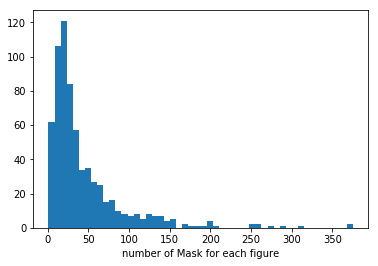

In [40]:
n, bins, patches = plt.hist(NumMask, 50)
plt.xlabel("number of Mask for each figure")
plt.show()